In [2]:
!pip install torch torchvision


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [5]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [6]:
def train_model(optimizer_name="SGD", lr=0.01, epochs=10):
    model = SimpleCNN()
    criterion = nn.CrossEntropyLoss()

    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    else:
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    train_acc = []
    test_acc = []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_acc.append(correct / total)

        # Evaluate on test set
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc.append(correct / total)
        print(f"Epoch {epoch+1}: Train Acc = {train_acc[-1]:.4f}, Test Acc = {test_acc[-1]:.4f}")

    return train_acc, test_acc


Epoch 1: Train Acc = 0.5533, Test Acc = 0.6551
Epoch 2: Train Acc = 0.6980, Test Acc = 0.7059
Epoch 3: Train Acc = 0.7641, Test Acc = 0.7329
Epoch 4: Train Acc = 0.8234, Test Acc = 0.7348
Epoch 5: Train Acc = 0.8801, Test Acc = 0.7345
Epoch 6: Train Acc = 0.9261, Test Acc = 0.7317
Epoch 7: Train Acc = 0.9590, Test Acc = 0.7350
Epoch 8: Train Acc = 0.9701, Test Acc = 0.7380
Epoch 9: Train Acc = 0.9774, Test Acc = 0.7186
Epoch 10: Train Acc = 0.9800, Test Acc = 0.7324
Epoch 1: Train Acc = 0.4387, Test Acc = 0.5500
Epoch 2: Train Acc = 0.6118, Test Acc = 0.6528
Epoch 3: Train Acc = 0.6949, Test Acc = 0.6494
Epoch 4: Train Acc = 0.7511, Test Acc = 0.6953
Epoch 5: Train Acc = 0.8030, Test Acc = 0.7255
Epoch 6: Train Acc = 0.8562, Test Acc = 0.7267
Epoch 7: Train Acc = 0.9009, Test Acc = 0.7274
Epoch 8: Train Acc = 0.9379, Test Acc = 0.7222
Epoch 9: Train Acc = 0.9648, Test Acc = 0.7299
Epoch 10: Train Acc = 0.9796, Test Acc = 0.7354


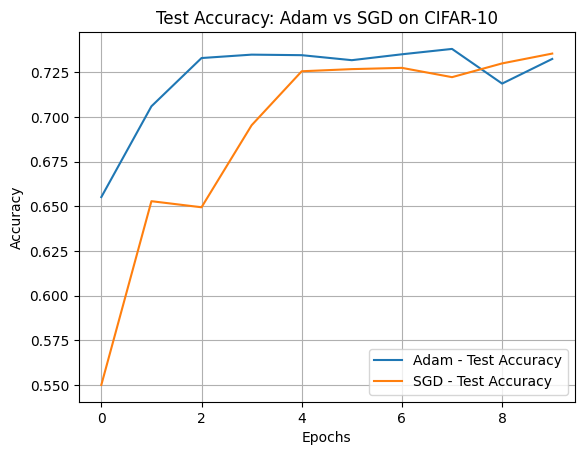

In [7]:
adam_train, adam_test = train_model("Adam", lr=0.001)
sgd_train, sgd_test = train_model("SGD", lr=0.01)

plt.plot(adam_test, label="Adam - Test Accuracy")
plt.plot(sgd_test, label="SGD - Test Accuracy")
plt.title("Test Accuracy: Adam vs SGD on CIFAR-10")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
